<a href="https://colab.research.google.com/github/ThinhDS/Learning-Thinh/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Xây dựng một chuẩn hóa đầu vào cho ảnh

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Khởi tạo dữ trainset qui định dữ liệu training
trainset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = True, 
                                       download = True, transform = transform)

# Khởi tạo trainloader qui định cách truyền dữ liệu vào model theo batch. 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, 
                                         shuffle = True, num_workers = 2)

# Tương tự nhưng đối với test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, 
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                              shuffle = False, num_workers = 2)

# Nhãn cho các class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


In [ ]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [ ]:
print(trainset[1])


(tensor([[[ 0.2078, -0.0118, -0.1765,  ..., -0.2863, -0.3176, -0.3804],
         [ 0.0980,  0.1373, -0.0196,  ..., -0.2471, -0.3961, -0.4431],
         [ 0.0980,  0.0902, -0.0980,  ..., -0.3804, -0.4667, -0.4745],
         ...,
         [ 0.3725,  0.2235,  0.2078,  ..., -0.6706, -0.5216, -0.2706],
         [ 0.2941,  0.2235,  0.2471,  ..., -0.1922, -0.0353,  0.0275],
         [ 0.2784,  0.2392,  0.2784,  ...,  0.1216,  0.1216,  0.1216]],

        [[ 0.3882,  0.0745, -0.1843,  ..., -0.2549, -0.2941, -0.3647],
         [ 0.2549,  0.2000, -0.0196,  ..., -0.2235, -0.3725, -0.4275],
         [ 0.2157,  0.1451, -0.0980,  ..., -0.3569, -0.4510, -0.4588],
         ...,
         [ 0.3098,  0.2078,  0.2549,  ..., -0.7333, -0.5843, -0.3490],
         [ 0.2078,  0.1922,  0.2627,  ..., -0.2706, -0.1059, -0.0510],
         [ 0.1608,  0.1608,  0.2235,  ...,  0.0431,  0.0510,  0.0431]],

        [[ 0.4667,  0.0667, -0.2549,  ..., -0.4431, -0.4431, -0.4510],
         [ 0.3255,  0.2078, -0.0745,  ..., -

In [ ]:
type(trainset[0])

tuple

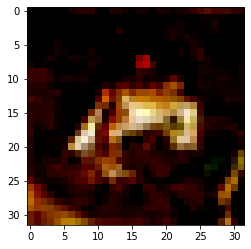

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(trainset[0][0].numpy().transpose(1,2,0))

Tham khao: 

In [ ]:
print(type(trainset[0][0]))
print(trainset[0][0].size())
print(classes[trainset[0][1]])

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
frog


Hiển thị hình ảnh bằng Matplotlib

[[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.99215686 ... 0.46666667 0.5        0.5       ]
  ...
  [0.5        0.5        0.5411765  ... 0.44313726 0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.9607843  ... 0.5372549  0.5        0.5       ]
  ...
  [0.5        0.5        0.4        ... 0.45882353 0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5     

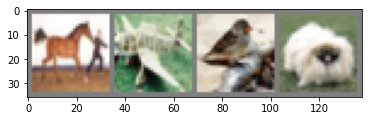

horse plane  bird   dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [ ]:
dataiter.next()[1]

tensor([7, 6, 1, 2])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Conv2d: input nodes, output nodes, kernel size
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))

    x = self.pool(F.relu(self.conv2(x)))

    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()

Tạo Optimizer và loss

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.1)


In [ ]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
    inputs, labels = data
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = net(inputs)
    print(outputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training')

Streaming output truncated to the last 5000 lines.
         -0.4744, -0.7904],
        [ 0.2160,  0.5704, -0.1608, -0.1948, -0.3298, -0.4944, -1.3198,  0.2554,
          0.3241,  0.6192],
        [-1.5675, -1.5852,  1.1436,  0.7178,  1.3795,  0.5861,  1.4684,  0.4361,
         -2.5508, -1.6516]], grad_fn=<AddmmBackward0>)
tensor(1.5122, grad_fn=<NllLossBackward0>)
tensor([[-1.1314, -2.5956,  1.1787,  1.1176,  1.5634,  1.5766, -0.1251,  2.0989,
         -2.1390, -3.1532],
        [-0.2246,  0.9995, -0.5437, -0.1553, -0.5871, -0.5892, -0.3203, -0.7119,
          0.2080,  0.9061],
        [ 0.5035, -0.2386, -0.0385,  0.6667, -0.5330,  0.9888, -1.3762, -0.4816,
          0.3434, -1.0543],
        [-0.6830, -0.6495,  0.0114,  1.0360,  0.1239,  1.3196, -1.0830,  0.9212,
         -1.1395, -1.9509]], grad_fn=<AddmmBackward0>)
tensor(1.5889, grad_fn=<NllLossBackward0>)
tensor([[-0.0170,  2.1452, -1.0968, -0.3388, -1.4397, -0.8346, -1.4617, -1.0275,
          0.8264,  1.4096],
        [-0.5724, 

Kiểm tra mô hình trên dataset

[[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.61960787 ... 0.7529412  0.5        0.5       ]
  ...
  [0.5        0.5        0.2117647  ... 0.28627452 0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.4392157  ... 0.7176471  0.5        0.5       ]
  ...
  [0.5        0.5        0.41960785 ... 0.26666668 0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5     

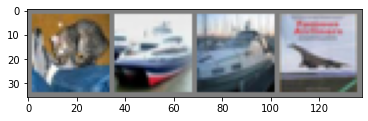

GroundTruth:   cat  ship  ship plane


In [ ]:
# Hiển thị một vài dữ liệu
# Sử dụng hàm iter để biến testloader thành 1 iterator, từ đó có thể lấy các giá trị tiếp theo.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print image
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: {}'.format(' '.join('%5s' % classes[labels[j]] for j in range(4))))